# get_all_cell_occupied

In [19]:
%run node_feature_utils.py
occupied_cell = get_all_cell_occupied(frame_index_off_set = 1051,frame_index_begin = 0,frame_index_end = 149)

In [20]:
# occupied_cell

# parse_trajectory_data

In [21]:
trajectory_positions, trajectory_orientations = parse_trajectory_data("./6DoF-HMD-UserNavigationData-master/NavigationData/H1_nav.csv",user_index='P01_V1')

In [22]:
trajectory_positions.shape

(549, 3)

# get_cell_in_view_frustum

In [23]:
# %run node_feature_utils.py
FoV_cell = get_cell_in_view_frustum(trajectory_positions,trajectory_orientations, occupied_cell)

In [24]:
# FoV_cell

# get_feature_for_all_cell | given frame index range

## output is cell's visibility label

In [25]:
%run node_feature_utils.py
node_occlusion_feature_df = get_occlusion_feature_for_all_cell(FoV_cell,occupied_cell,trajectory_positions,trajectory_orientations,
                              trajectory_frame_index_begin=0,trajectory_frame_index_end=65)

10000


# cell occlusion level distribution

In [26]:
node_occlusion_feature_df

,cell,ts,label
0,"(5, 12, 6)",0,1.000000
1,"(7, 1, 8)",0,0.000000
2,"(6, 7, 6)",0,0.718436
3,"(7, 3, 5)",0,0.000000
4,"(7, 12, 8)",0,0.131690
...,...,...,...
13019,"(8, 10, 4)",65,1.000000
13020,"(9, 14, 8)",65,0.227344
13021,"(7, 7, 9)",65,0.263009
13022,"(6, 2, 7)",65,0.414248


In [27]:
node_occlusion_feature_df.loc[node_occlusion_feature_df.cell==(5, 12, 6)].iloc[0].label

1.0

count    13024.000000
mean         0.335312
std          0.373198
min          0.000000
25%          0.005950
50%          0.192306
75%          0.570700
max          1.000000
Name: label, dtype: float64


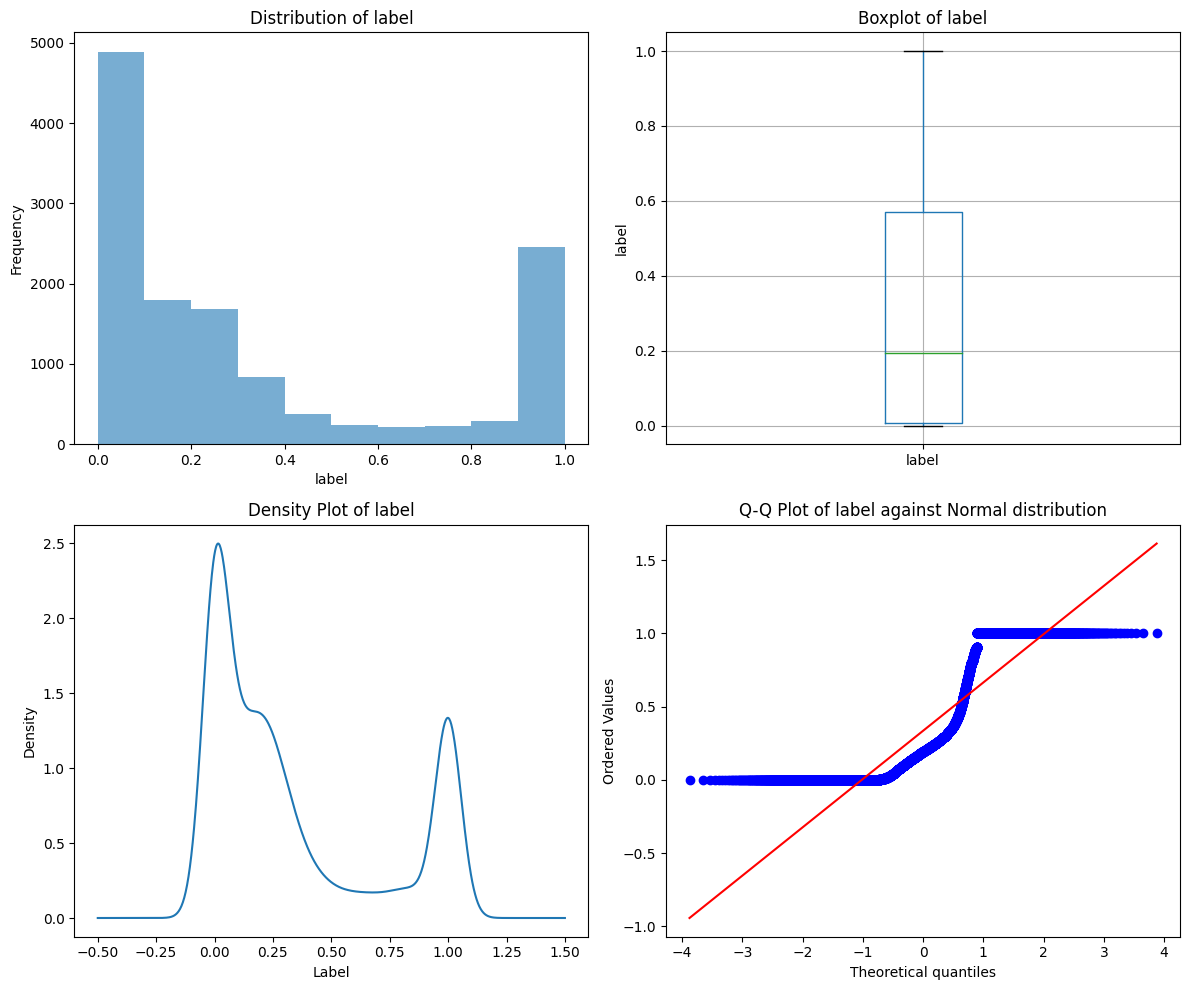

In [28]:
%run node_feature_utils.py
cell_occlusion_level_distribution(node_occlusion_feature_df)

In [1]:
%run node_feature_utils.py
rendering_from_node_feature(trajectory_positions,trajectory_orientations,
                            node_occlusion_feature_df,FoV_cell,trajectory_index=0,frame_index_off_set=1051)

NameError: name 'trajectory_positions' is not defined

In [28]:
# import open3d as o3d

# tile_ply = './tile_data/recons/1051/longdress_1051_06_15_07_6.ply'
# tile_ply = '/Users/chenli/research/point cloud/8i/longdress/longdress/Ply/longdress_vox10_1188.ply'
# if os.path.exists(tile_ply):
#     pcd = o3d.io.read_point_cloud(tile_ply)
#     print(pcd)
    
# else:
#     print("File not found:", tile_ply)


# generate_event_for_tgn

In [12]:
from collections import defaultdict
cell2node = defaultdict(int)
node2cell = defaultdict(tuple)
for y in range(16):
    for z in range(16):
        for x in range(16):
            cell2node[tuple([x,y,z])] = y*256 + z* 16 + x
            node2cell[y*256 + z* 16 + x] = tuple([x,y,z])

In [15]:
%run node_feature_utils.py
tgn_event_df = generate_event_for_tgn(node_occlusion_feature_df,occupied_cell,cell2node)

100000
200000
300000
400000


In [16]:
tgn_event_df

,u,i,ts,label,idx
0,3173,2917,0,1.000000,1
1,3173,2933,0,1.000000,2
2,3173,3189,0,1.000000,3
3,3173,3445,0,1.000000,4
4,3173,2918,0,1.000000,5
...,...,...,...,...,...
459501,1128,1113,149,0.232015,459502
459502,1128,1129,149,0.232015,459503
459503,1128,1369,149,0.232015,459504
459504,1128,1385,149,0.232015,459505


In [18]:
tgn_event_df.to_csv('ml_tgn_u1_5s.csv',index=None) 

In [17]:
# node_occlusion_feature_df

In [56]:
# FoV_cell[130]